# Differentiable KS-DFT in 3D
### Compute the dataset and components to launch the training

In [1]:
import qedft
from qedft.data_io.td.dataset_generation import DataGenerator, MoleculeConfig
from pathlib import Path
import os
from loguru import logger

# Example usage
config = MoleculeConfig(
    name="H2_test",
    atom_coords="H 0 0 0; H 0 0 0.74",
    units="Ang",
    basis="631g",
    method="CCSD",
    grid_density=0,
)

project_path = Path(os.path.dirname(os.path.dirname(qedft.__file__)))
output_dir = project_path / "data" / "td"
generator = DataGenerator(output_dir=output_dir)
mol, mf, dm_ao, energy, density, coords = generator.generate_data(config, save_data=True)


2025-05-02 14:28:46.794 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:321 -     Generating data using ccsd method


converged SCF energy = -1.12675531719693
E(CCSD) = -1.151672678339737  E_corr = -0.0249173611428062


/Users/igorsokolov/PycharmProjects/qedft/.venv/lib/python3.10/site-packages/pyscf/gto/mole.py:1294: UserWarning: Function mol.dumps drops attribute coords because it is not JSON-serializable
  warnings.warn(msg)
/Users/igorsokolov/PycharmProjects/qedft/.venv/lib/python3.10/site-packages/pyscf/gto/mole.py:1294: UserWarning: Function mol.dumps drops attribute exp because it is not JSON-serializable
  warnings.warn(msg)
/Users/igorsokolov/PycharmProjects/qedft/.venv/lib/python3.10/site-packages/pyscf/gto/mole.py:1294: UserWarning: Function mol.dumps drops attribute ctr_coeff because it is not JSON-serializable
  warnings.warn(msg)
/Users/igorsokolov/PycharmProjects/qedft/.venv/lib/python3.10/site-packages/pyscf/gto/mole.py:1294: UserWarning: Function mol.dumps drops attribute _enuc because it is not JSON-serializable
  warnings.warn(msg)
<class 'pyscf.cc.ccsd.CCSD'> does not have attributes  converged


E(CCSD) = -1.151672678339737  E_corr = -0.0249173611428062


/Users/igorsokolov/PycharmProjects/qedft/.venv/lib/python3.10/site-packages/pyscf/gto/mole.py:1294: UserWarning: Function mol.dumps drops attribute coords because it is not JSON-serializable
  warnings.warn(msg)
/Users/igorsokolov/PycharmProjects/qedft/.venv/lib/python3.10/site-packages/pyscf/gto/mole.py:1294: UserWarning: Function mol.dumps drops attribute exp because it is not JSON-serializable
  warnings.warn(msg)
/Users/igorsokolov/PycharmProjects/qedft/.venv/lib/python3.10/site-packages/pyscf/gto/mole.py:1294: UserWarning: Function mol.dumps drops attribute ctr_coeff because it is not JSON-serializable
  warnings.warn(msg)
/Users/igorsokolov/PycharmProjects/qedft/.venv/lib/python3.10/site-packages/pyscf/gto/mole.py:1294: UserWarning: Function mol.dumps drops attribute _enuc because it is not JSON-serializable
  warnings.warn(msg)


converged SCF energy = -1.03718794786902


2025-05-02 14:28:48.992 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1240
2025-05-02 14:28:48.992 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-02 14:28:48.992 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1240,)
2025-05-02 14:28:48.993 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.1516726783397369
2025-05-02 14:28:49.006 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:204 - 
PARSER: Starting and converting if needed to Ang...
2025-05-02 14:28:49.006 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:205 - PARSER: PySCF typically does everything in NOT in Angstroms (A) but Bohr (B) - atomic units.
2025-05-02 14:28:49.006 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:21

In [2]:
print(f"Generated data for {config.name}")
print(f"Energy: {energy}")
print(f"Grid points: {coords.shape[0]}")
print(f"Density: {density}")
print(f"Density shape: {density.shape}")
print(f"DM AO shape: {dm_ao.shape}")
print(f"DM AO: {dm_ao}")
print(f"Molecule: {mol}")
print(f"Mean field: {mf}")

Generated data for H2_test
Energy: -1.1516726783397377
Grid points: 1192
Density: [6.72815113e-13 3.23056307e-11 1.63724571e-12 ... 1.63724571e-12
 3.23056307e-11 6.72815113e-13]
Density shape: (1192,)
DM AO shape: (4, 4)
DM AO: [[0.23211218 0.18285689 0.20607785 0.16169728]
 [0.18285689 0.1546802  0.16169728 0.133479  ]
 [0.20607785 0.16169728 0.23211218 0.18285689]
 [0.16169728 0.133479   0.18285689 0.1546802 ]]
Molecule: <pyscfad.gto.mole.Mole object at 0x109826c80>
Mean field: RKS-KohnShamDFT object of <class 'pyscfad.dft.rks.RKS'>


# Launch the training 

In [20]:
# Get project path
project_path = Path(os.path.dirname(os.path.dirname(qedft.__file__)))

import jax.numpy as jnp

# Create H2 bonds example
h2_config = {
    "features": [512, 512, 1],
    "train_bond_lengths": [0.74, 0.5, 1.5],
    "val_bond_lengths": [0.6, 0.9, 1.2],
    "n_iterations": 100,  # Small for testing
    "batch_size": 3,
    "is_global_xc": True,
    "results_dir": "results/h2_test_run",
}

# Create custom molecule example
custom_basis = "631g"
custom_method = "CCSD"

# Configuration with custom molecules
custom_config = None

# Choose which example to run
use_custom_molecules = False
config = custom_config if use_custom_molecules else h2_config

# Initialize network with STAX
from qedft.models.networks import GlobalMLP
from qedft.train.td.stax_to_flax_network import adapt_stax_for_training

model = GlobalMLP()
num_grid_points = 1192
network_stax = model.build_network(grids=jnp.linspace(0, 1, num_grid_points))
stax_init_fn, stax_apply_fn = network_stax  # your STAX model
network, params = adapt_stax_for_training(stax_init_fn, stax_apply_fn, (num_grid_points,))
logger.info(f"Network initialized with {num_grid_points} grid points")

2025-05-01 14:07:53.211 | INFO     | __main__:<module>:37 - Network initialized with 1192 grid points


In [29]:
from qedft.train.td.trainer_legacy_no_jit import TDKSDFTTrainer

# Initialize and train
trainer = TDKSDFTTrainer(config, network=network)
params, opt_state, train_losses, val_losses, val_iters = trainer.train()

print("Training and evaluation complete!")
print(f"Results saved in {trainer.results_dir}")

2025-05-01 16:06:17.111 | INFO     | qedft.train.td.trainer_legacy_no_jit:__init__:168 - Initialized trainer with config: {'features': [512, 512, 1], 'train_bond_lengths': [0.74, 0.5, 1.5], 'val_bond_lengths': [0.6, 0.9, 1.2], 'n_iterations': 100, 'batch_size': 3, 'is_global_xc': True, 'results_dir': 'results/h2_test_run'}
2025-05-01 16:06:17.112 | INFO     | qedft.train.td.trainer_legacy_no_jit:prepare_dataset:215 - Generating training data...
2025-05-01 16:06:17.623 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:321 -     Generating data using ccsd method


converged SCF energy = -1.12675531719693
E(CCSD) = -1.151672678339738  E_corr = -0.02491736114280624
E(CCSD) = -1.151672678339738  E_corr = -0.02491736114280624


2025-05-01 16:06:17.767 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1192
2025-05-01 16:06:17.768 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-01 16:06:17.768 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1192,)
2025-05-01 16:06:17.769 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.1516726783397377
2025-05-01 16:06:17.782 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:204 - 
PARSER: Starting and converting if needed to Ang...
2025-05-01 16:06:17.783 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:205 - PARSER: PySCF typically does everything in NOT in Angstroms (A) but Bohr (B) - atomic units.
2025-05-01 16:06:17.784 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:21

converged SCF energy = -1.05802481296927
E(CCSD) = -1.077863888625149  E_corr = -0.01983907565588313
E(CCSD) = -1.077863888625149  E_corr = -0.01983907565588313


2025-05-01 16:06:18.109 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1192
2025-05-01 16:06:18.110 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-01 16:06:18.110 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1192,)
2025-05-01 16:06:18.111 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.0778638886251495
2025-05-01 16:06:18.127 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:204 - 
PARSER: Starting and converting if needed to Ang...
2025-05-01 16:06:18.127 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:205 - PARSER: PySCF typically does everything in NOT in Angstroms (A) but Bohr (B) - atomic units.
2025-05-01 16:06:18.128 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:21

converged SCF energy = -0.997497294328357
E(CCSD) = -1.054347450987067  E_corr = -0.05685015665871018
E(CCSD) = -1.054347450987067  E_corr = -0.05685015665871018


2025-05-01 16:06:18.445 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1192
2025-05-01 16:06:18.446 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-01 16:06:18.446 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1192,)
2025-05-01 16:06:18.447 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.054347450987067
2025-05-01 16:06:18.461 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:204 - 
PARSER: Starting and converting if needed to Ang...
2025-05-01 16:06:18.461 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:205 - PARSER: PySCF typically does everything in NOT in Angstroms (A) but Bohr (B) - atomic units.
2025-05-01 16:06:18.461 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:213

converged SCF energy = -1.11003089523311
E(CCSD) = -1.131953433438712  E_corr = -0.02192253820560002
E(CCSD) = -1.131953433438712  E_corr = -0.02192253820560002


2025-05-01 16:06:18.774 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1192
2025-05-01 16:06:18.774 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-01 16:06:18.775 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1192,)
2025-05-01 16:06:18.775 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.131953433438712
2025-05-01 16:06:18.939 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:321 -     Generating data using ccsd method


converged SCF energy = -1.11168637398406
E(CCSD) = -1.140602464558199  E_corr = -0.0289160905741347
E(CCSD) = -1.140602464558199  E_corr = -0.0289160905741347


2025-05-01 16:06:19.091 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1192
2025-05-01 16:06:19.092 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-01 16:06:19.092 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1192,)
2025-05-01 16:06:19.093 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.1406024645581994
2025-05-01 16:06:19.244 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:321 -     Generating data using ccsd method


converged SCF energy = -1.05575928255497
E(CCSD) = -1.095595490661586  E_corr = -0.03983620810661737
E(CCSD) = -1.095595490661586  E_corr = -0.03983620810661737


2025-05-01 16:06:19.392 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1192
2025-05-01 16:06:19.393 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-01 16:06:19.393 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1192,)
2025-05-01 16:06:19.393 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.095595490661586
2025-05-01 16:06:19.404 | INFO     | qedft.train.td.trainer_legacy_no_jit:train:415 - Network initialized with 1192 grid points
2025-05-01 16:06:19.407 | INFO     | qedft.train.td.trainer_legacy_no_jit:train:452 - Starting training...
  0%|          | 0/100 [00:00<?, ?it/s]


ValueError: Non-hashable static arguments are not supported. An error occurred while trying to hash an object of type <class 'qedft.train.td.trainer_legacy_no_jit.MLP'>, MLP(
    # attributes
    features = [512, 512]
    act_fn = gelu
    scale = 1.0
). The error was:
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.10/3.10.16/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
  File "/opt/homebrew/Cellar/python@3.10/3.10.16/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
  File "/opt/homebrew/Cellar/python@3.10/3.10.16/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
  File "/opt/homebrew/Cellar/python@3.10/3.10.16/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
  File "/opt/homebrew/Cellar/python@3.10/3.10.16/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/events.py", line 80, in _run
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3147, in run_cell
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3200, in _run_cell
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_cell_async
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3585, in run_ast_nodes
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3645, in run_code
  File "/var/folders/l5/yrk8ltw15_vgjbyfkwbcyrv00000gn/T/ipykernel_94725/3200284750.py", line 5, in <module>
  File "/Users/igorsokolov/PycharmProjects/qedft/qedft/train/td/trainer_legacy_no_jit.py", line 468, in train
  File "/Users/igorsokolov/PycharmProjects/qedft/qedft/train/td/trainer_legacy_no_jit.py", line 284, in _compute_loss_and_grad
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/traceback_util.py", line 180, in reraise_with_filtered_traceback
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/api.py", line 463, in value_and_grad_f
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/api.py", line 1968, in _vjp
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/interpreters/ad.py", line 187, in vjp
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/interpreters/ad.py", line 176, in linearize
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/profiler.py", line 333, in wrapper
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/interpreters/partial_eval.py", line 572, in trace_to_jaxpr_nounits
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/linear_util.py", line 187, in call_wrapped
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/interpreters/partial_eval.py", line 585, in trace_to_subjaxpr_nounits
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/interpreters/partial_eval.py", line 614, in _trace_to_subjaxpr_nounits
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/api_util.py", line 74, in flatten_fun
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/interpreters/ad.py", line 78, in jvpfun
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/interpreters/ad.py", line 92, in jvp_subtrace
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/api_util.py", line 90, in flatten_fun_nokwargs
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/api_util.py", line 294, in _argnums_partial
  File "/Users/igorsokolov/PycharmProjects/qedft/qedft/train/td/trainer_legacy_no_jit.py", line 266, in batch_loss_fn
  File "/Users/igorsokolov/PycharmProjects/qedft/qedft/train/td/hf_legacy.py", line 484, in kernel
  File "/Users/igorsokolov/PycharmProjects/qedft/qedft/train/td/hf_legacy.py", line 202, in kernel
  File "/Users/igorsokolov/PycharmProjects/qedft/qedft/train/td/hf_legacy.py", line 71, in _scf
  File "/Users/igorsokolov/PycharmProjects/qedft/qedft/train/td/rks_legacy.py", line 61, in get_veff
  File "/Users/igorsokolov/PycharmProjects/qedft/qedft/train/td/numint_legacy.py", line 315, in nr_rks
  File "/Users/igorsokolov/PycharmProjects/qedft/qedft/train/td/trainer_legacy_no_jit.py", line 89, in eval_xc
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/traceback_util.py", line 180, in reraise_with_filtered_traceback
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/pjit.py", line 337, in cache_miss
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/pjit.py", line 177, in _python_pjit_helper
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/jax/_src/pjit.py", line 768, in _infer_params
  File "/Users/igorsokolov/PycharmProjects/qedft/.venv_legacy/lib/python3.10/site-packages/flax/linen/module.py", line 733, in wrapped
TypeError: Failed to hash Flax Module.  The module probably contains unhashable attributes.  Module=MLP(
    # attributes
    features = [512, 512]
    act_fn = gelu
    scale = 1.0
)


In [6]:
# params, opt_state, train_losses, val_losses, val_iters
print(f"Training completed with final loss: {train_losses[-1]}")
print(f"Optimization info: {val_losses[-1]}")
print(f"Params: {params}")

Training completed with final loss: 0.00617934664309041
Optimization info: 0.005104987250202458
Params: {'params': {'stax_params': [(Array([[-0.04208405, -0.00359664, -0.08798345, ...,  0.07866035,
         0.05963382,  0.03105498],
       [ 0.01082706,  0.0886657 ,  0.02540464, ...,  0.02229804,
         0.0123717 , -0.04549247],
       [-0.02214782,  0.00380083,  0.00393172, ...,  0.01612457,
         0.07697576, -0.06341909],
       ...,
       [-0.03594508, -0.08580208, -0.03761511, ..., -0.02893419,
         0.03842063,  0.0065149 ],
       [-0.04362161,  0.05585798,  0.01943976, ..., -0.01506953,
         0.04127719, -0.03382873],
       [ 0.00456758,  0.01680119,  0.03572902, ...,  0.06703187,
         0.06308289,  0.01285544]], dtype=float64), Array([-0.00085851, -0.00370023, -0.01103177,  0.00042469,  0.00949033,
       -0.01914689,  0.00278845, -0.00219073, -0.00832127,  0.00604623,
        0.01771341, -0.00815013,  0.02061044,  0.00806073,  0.01454088,
        0.00049116,  0

2025-05-02 14:44:13.110 | INFO     | __main__:<module>:34 - Network initialized with 1192 grid points
2025-05-02 14:44:13.126 | INFO     | qedft.train.td.trainer_legacy_no_jit:__init__:168 - Initialized trainer with config: {'features': [512, 512, 1], 'train_bond_lengths': [0.74, 0.5, 1.5], 'val_bond_lengths': [0.6, 0.9, 1.2], 'n_iterations': 100, 'batch_size': 3, 'is_global_xc': True, 'results_dir': 'results/h2_test_run'}
2025-05-02 14:44:13.127 | INFO     | qedft.train.td.trainer_legacy_no_jit:prepare_dataset:215 - Generating training data...
2025-05-02 14:44:13.716 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:321 -     Generating data using ccsd method


converged SCF energy = -1.12675531719693
E(CCSD) = -1.151672678339738  E_corr = -0.02491736114280624
E(CCSD) = -1.151672678339738  E_corr = -0.02491736114280624


2025-05-02 14:44:15.511 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1192
2025-05-02 14:44:15.511 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-02 14:44:15.512 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1192,)
2025-05-02 14:44:15.512 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.1516726783397377
2025-05-02 14:44:15.526 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:204 - 
PARSER: Starting and converting if needed to Ang...
2025-05-02 14:44:15.526 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:205 - PARSER: PySCF typically does everything in NOT in Angstroms (A) but Bohr (B) - atomic units.
2025-05-02 14:44:15.526 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:21

converged SCF energy = -1.05802481296927
E(CCSD) = -1.077863888625149  E_corr = -0.01983907565588313
E(CCSD) = -1.077863888625149  E_corr = -0.01983907565588313


2025-05-02 14:44:15.790 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1192
2025-05-02 14:44:15.791 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-02 14:44:15.791 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1192,)
2025-05-02 14:44:15.791 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.0778638886251495
2025-05-02 14:44:15.805 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:204 - 
PARSER: Starting and converting if needed to Ang...
2025-05-02 14:44:15.805 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:205 - PARSER: PySCF typically does everything in NOT in Angstroms (A) but Bohr (B) - atomic units.
2025-05-02 14:44:15.806 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:21

converged SCF energy = -0.997497294328357
E(CCSD) = -1.054347450987067  E_corr = -0.05685015665871018
E(CCSD) = -1.054347450987067  E_corr = -0.05685015665871018


2025-05-02 14:44:15.999 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1192
2025-05-02 14:44:15.999 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-02 14:44:16.000 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1192,)
2025-05-02 14:44:16.000 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.054347450987067
2025-05-02 14:44:16.013 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:204 - 
PARSER: Starting and converting if needed to Ang...
2025-05-02 14:44:16.014 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:205 - PARSER: PySCF typically does everything in NOT in Angstroms (A) but Bohr (B) - atomic units.
2025-05-02 14:44:16.014 | INFO     | qedft.data_io.td.dataset_generation:parse_density_data:213

converged SCF energy = -1.11003089523311
E(CCSD) = -1.131953433438712  E_corr = -0.02192253820560002
E(CCSD) = -1.131953433438712  E_corr = -0.02192253820560002


2025-05-02 14:44:16.197 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1192
2025-05-02 14:44:16.198 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-02 14:44:16.198 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1192,)
2025-05-02 14:44:16.198 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.131953433438712
2025-05-02 14:44:16.255 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:321 -     Generating data using ccsd method


converged SCF energy = -1.11168637398406
E(CCSD) = -1.140602464558199  E_corr = -0.0289160905741347
E(CCSD) = -1.140602464558199  E_corr = -0.0289160905741347


2025-05-02 14:44:16.376 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1192
2025-05-02 14:44:16.376 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-02 14:44:16.377 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1192,)
2025-05-02 14:44:16.377 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.1406024645581994
2025-05-02 14:44:16.441 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:321 -     Generating data using ccsd method


converged SCF energy = -1.05575928255497
E(CCSD) = -1.095595490661586  E_corr = -0.03983620810661737
E(CCSD) = -1.095595490661586  E_corr = -0.03983620810661737


2025-05-02 14:44:16.583 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:499 -     Number of grid points: 1192
2025-05-02 14:44:16.584 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:500 -     Density matrix AO shape: (4, 4)
2025-05-02 14:44:16.584 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:501 -     Shape of rho: (1192,)
2025-05-02 14:44:16.584 | INFO     | qedft.data_io.td.dataset_generation:calculate_energy_and_density:502 -     Energy total: -1.095595490661586
2025-05-02 14:44:16.588 | INFO     | qedft.train.td.trainer_legacy_no_jit:train:415 - Network initialized with 1192 grid points
2025-05-02 14:44:16.711 | INFO     | qedft.train.td.trainer_legacy_no_jit:train:452 - Starting training...
  0%|          | 0/100 [00:00<?, ?it/s]2025-05-02 14:44:23.346 | INFO     | qedft.train.td.trainer_legacy_no_jit:train:485 - Iteration 0, Training Loss: 0.362445
2025-05-02 14:44:23.698 | INFO     | qed

KeyboardInterrupt: 

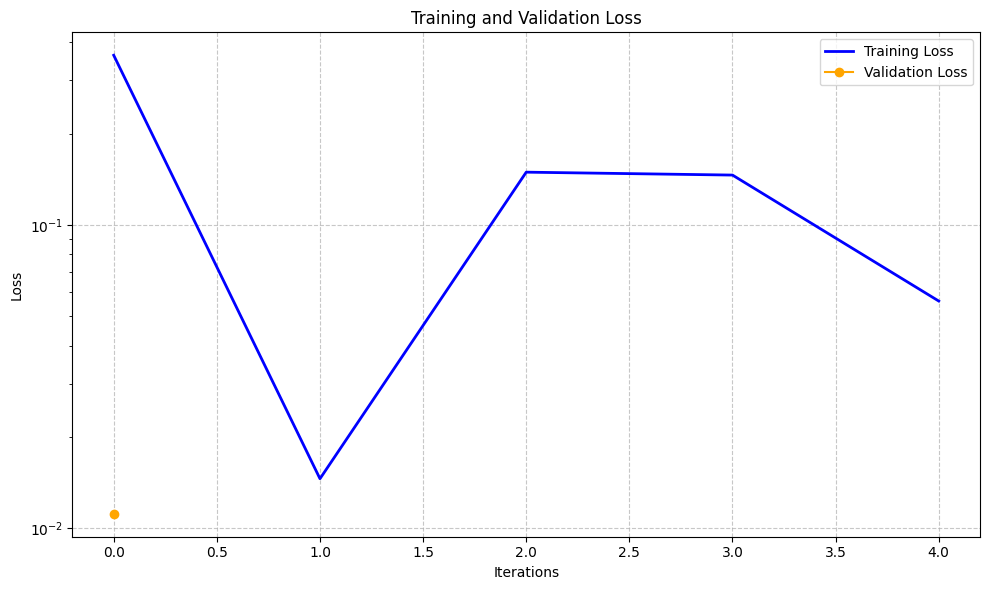

In [2]:
# Demo snippet
import os
import qedft
from qedft.models.networks import GlobalMLP
from qedft.config.config import Config
from pathlib import Path
import jax.numpy as jnp
from qedft.train.td.trainer_legacy_no_jit import TDKSDFTTrainer
from qedft.models.networks import GlobalMLP
from qedft.train.td.stax_to_flax_network import adapt_stax_for_training
from loguru import logger

# Get project path
project_path = Path(os.path.dirname(os.path.dirname(qedft.__file__)))


# Create H2 bonds example
config = {
    "features": [512, 512, 1],
    "train_bond_lengths": [0.74, 0.5, 1.5],
    "val_bond_lengths": [0.6, 0.9, 1.2],
    "n_iterations": 100,  # Small for testing
    "batch_size": 3,
    "is_global_xc": True,
    "results_dir": "results/h2_test_run",
}

# Initialize network with STAX and then convert to Flax
model = GlobalMLP()
num_grid_points = 1192
network_stax = model.build_network(grids=jnp.linspace(0, 1, num_grid_points))
stax_init_fn, stax_apply_fn = network_stax  # your STAX model
network, params = adapt_stax_for_training(stax_init_fn, stax_apply_fn, (num_grid_points,))
logger.info(f"Network initialized with {num_grid_points} grid points")

# Initialize and train
trainer = TDKSDFTTrainer(config, network=network)
params, opt_state, train_losses, val_losses, val_iters = trainer.train()

# Summary
- This notebook demonstrates training a neural network for Kohn-Sham DFT calculations
- We set up an H2 molecule configuration with different bond lengths for training and validation
- We use a GlobalMLP network architecture with 1192 grid points
- The network is trained using the TDKSDFTTrainer
- Training results (parameters, losses) are saved to the specified results directory
- The model learns to approximate the exchange-correlation functional for the H2 molecule system
- The notebook shows how to initialize, train, and evaluate the model performance
